In [42]:
import glob

import pandas as pd

import seaborn as sns

from tqdm import tqdm

tqdm.pandas()

In [43]:
data_base_dir = "data/by_date"

dates = []
dfs = {}
for fpath in glob.glob(data_base_dir + "/*"):
    df = pd.read_csv(fpath)
    date = df["date"].iloc[0]
    dfs[date] = df  # [df["question"].notnull()]
    dates.append(date)

dates.sort()

In [44]:
df = pd.concat(dfs)
df

speaker  \
1984-10-07 0    Dorothy Ridings   
           1    Barbara Walters   
           2     James Wieghart   
           3     James Wieghart   
           4     James Wieghart   
...                         ...   
2004-09-30 137       Jim Lehrer   
           138       John Kerry   
           139       Jim Lehrer   
           140   George W. Bush   
           141       Jim Lehrer   

                                                             text  type  \
1984-10-07 0    Good evening from the Kentucky Center for the ...  Pres   
           1    Thank you, Dorothy. A few words as we begin to...  Pres   
           2    Mr. President, in 1980 you promised the Americ...  Pres   
           3    Mr. President, the Congressional Budget Office...  Pres   
           4    Mr. Mondale, the Carter- Mondale administratio...  Pres   
...                                                           ...   ...   
2004-09-30 137  All right, that brings us to closing statement...  Pres   
           138  Thank you, Jim, very much. Thank you very much...  Pres   
           139                        Mr. President, two minutes.  Pres   
           140  Thank you very much tonight, Jim. Senator. If ...  Pres   
           141  And that ends tonights debate. A reminder, the...  Pres   

                election_year        date  candidate  qud question  \
1984-10-07 0             1984  1984-10-07          0  NaN      NaN   
           1             1984  1984-10-07          0  NaN      NaN   
           2             1984  1984-10-07          0  NaN      NaN   
           3             1984  1984-10-07          0  NaN      NaN   
           4             1984  1984-10-07          0  NaN      NaN   
...                       ...         ...        ...  ...      ...   
2004-09-30 137           2004  2004-09-30          0  NaN      NaN   
           138           2004  2004-09-30          1  NaN      NaN   
           139           2004  2004-09-30          0  NaN      NaN   
           140           2004  2004-09-30          1  NaN      NaN   
           141           2004  2004-09-30          0  NaN      NaN   

                similarity_cls  similarity_max  similarity_mean  \
1984-10-07 0               NaN             NaN              NaN   
           1               NaN             NaN              NaN   
           2               NaN             NaN              NaN   
           3               NaN             NaN              NaN   
           4               NaN             NaN              NaN   
...                        ...             ...              ...   
2004-09-30 137             NaN             NaN              NaN   
           138             NaN             NaN              NaN   
           139             NaN             NaN              NaN   
           140             NaN             NaN              NaN   
           141             NaN             NaN              NaN   

                similarity_sbert       party  
1984-10-07 0                 NaN   Moderator  
           1                 NaN   Moderator  
           2                 NaN   Moderator  
           3                 NaN   Moderator  
           4                 NaN   Moderator  
...                          ...         ...  
2004-09-30 137               NaN   Moderator  
           138               NaN  Democratic  
           139               NaN   Moderator  
           140               NaN  Republican  
           141               NaN   Moderator  

[2716 rows x 13 columns]

In [45]:
for i, d in enumerate(dates):
    print(f"{i}\t{d}\t{len(dfs[d])}\t{len(dfs[d].columns)}")

0	1960-09-26	68	13
1	1976-09-23	94	13
2	1980-09-21	76	13
3	1984-10-07	134	13
4	1988-09-25	161	13
5	1992-10-11	92	13
6	1996-10-06	144	13
7	2000-10-03	166	13
8	2004-09-30	142	13
9	2008-09-26	189	13
10	2012-10-03	210	13
11	2016-09-26	308	13
12	2020-09-29	932	13


In [46]:
for i, d in enumerate(dates):
    df_f = dfs[d][dfs[d]["question"].notnull()]
    print(f"{i}\t{d}\t{len(df_f)}\t{len(df_f.columns)}")

0	1960-09-26	10	13
1	1976-09-23	20	13
2	1980-09-21	12	13
3	1984-10-07	30	13
4	1988-09-25	23	13
5	1992-10-11	11	13
6	1996-10-06	21	13
7	2000-10-03	26	13
8	2004-09-30	18	13
9	2008-09-26	17	13
10	2012-10-03	25	13
11	2016-09-26	19	13
12	2020-09-29	39	13


In [47]:
debate_lenghts = df.groupby("date").size()
debate_lenghts_f = df[df["question"].notnull()].groupby("date").size()
debate_lenghts, debate_lenghts_f

(date
 1960-09-26     68
 1976-09-23     94
 1980-09-21     76
 1984-10-07    134
 1988-09-25    161
 1992-10-11     92
 1996-10-06    144
 2000-10-03    166
 2004-09-30    142
 2008-09-26    189
 2012-10-03    210
 2016-09-26    308
 2020-09-29    932
 dtype: int64,
 date
 1960-09-26    10
 1976-09-23    20
 1980-09-21    12
 1984-10-07    30
 1988-09-25    23
 1992-10-11    11
 1996-10-06    21
 2000-10-03    26
 2004-09-30    18
 2008-09-26    17
 2012-10-03    25
 2016-09-26    19
 2020-09-29    39
 dtype: int64)

In [48]:
df_melted = pd.melt(
    df,
    id_vars=[
        col
        for col in df.columns
        if col
        not in [
            "similarity_cls",
            "similarity_mean",
            "similarity_max",
            "similarity_sbert",
        ]
    ],
    var_name="measure",
    value_name="similarity",
)
df_melted

,speaker,text,type,election_year,date,candidate,qud,question,party,measure,similarity
0,Dorothy Ridings,Good evening from the Kentucky Center for the ...,Pres,1984,1984-10-07,0,NaN,NaN,Moderator,similarity_cls,NaN
1,Barbara Walters,"Thank you, Dorothy. A few words as we begin to...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,similarity_cls,NaN
2,James Wieghart,"Mr. President, in 1980 you promised the Americ...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,similarity_cls,NaN
3,James Wieghart,"Mr. President, the Congressional Budget Office...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,similarity_cls,NaN
4,James Wieghart,"Mr. Mondale, the Carter- Mondale administratio...",Pres,1984,1984-10-07,0,NaN,NaN,Moderator,similarity_cls,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10859,Jim Lehrer,"All right, that brings us to closing statement...",Pres,2004,2004-09-30,0,NaN,NaN,Moderator,similarity_sbert,NaN
10860,John Kerry,"Thank you, Jim, very much. Thank you very much...",Pres,2004,2004-09-30,1,NaN,NaN,Democratic,similarity_sbert,NaN
10861,Jim Lehrer,"Mr. President, two minutes.",Pres,2004,2004-09-30,0,NaN,NaN,Moderator,similarity_sbert,NaN
10862,George W. Bush,"Thank you very much tonight, Jim. Senator. If ...",Pres,2004,2004-09-30,1,NaN,NaN,Republican,similarity_sbert,NaN


<Axes: xlabel='date', ylabel='similarity'>

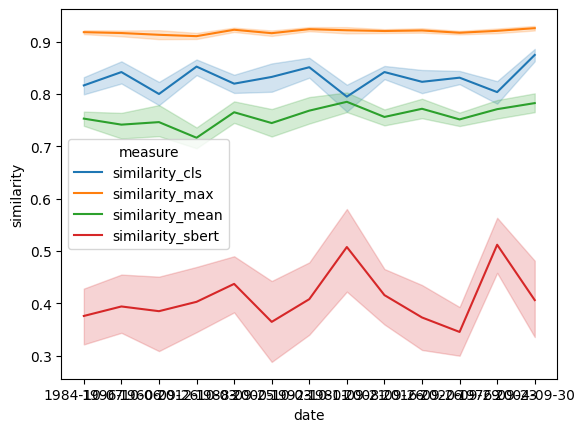

In [51]:
sns.lineplot(data=df_melted, x="date", y="similarity", hue="measure")

<Axes: xlabel='date', ylabel='similarity_cls'>

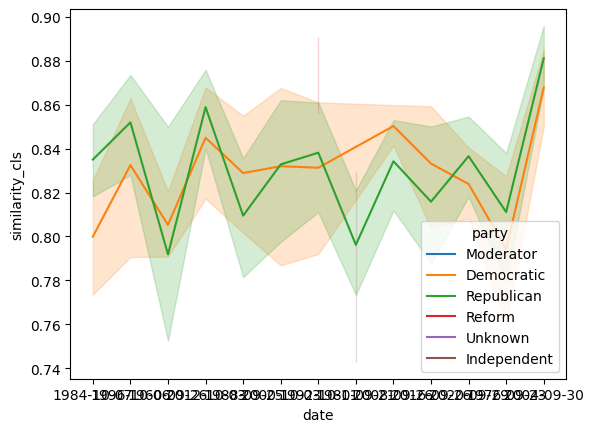

In [54]:
sns.lineplot(data=df, x="date", y="similarity_cls", hue="party")

<Axes: xlabel='date', ylabel='similarity_mean'>

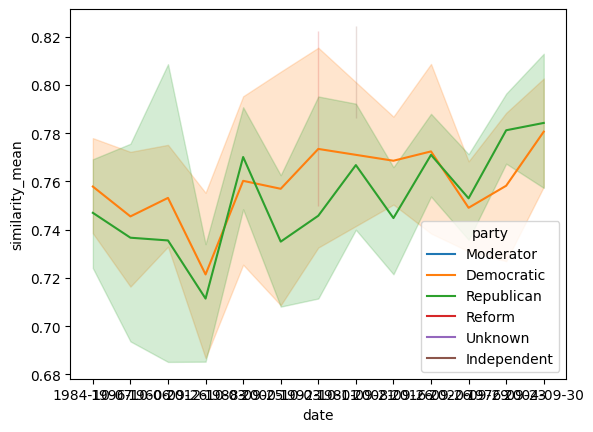

In [56]:
sns.lineplot(data=df, x="date", y="similarity_mean", hue="party")